In [69]:
import pickle
import numpy as np
import matplotlib.pyplot as plot
from matplotlib import cm, rcParams
import tensorflow as tf

# Set up the colormap and default settings
cmap = cm.get_cmap('plasma')
rcParams.update({'font.size': 12})

# Load place cell and reward cell network data
with open('pcn.pkl', 'rb') as f:
    pc_net = pickle.load(f)
with open('rcn.pkl', 'rb') as f:
    rc_net = pickle.load(f)

# Load environment data (place cell and reward map coordinates)
with open('hmap_x.pkl', 'rb') as f:
    hmap_x = pickle.load(f)
with open('hmap_y.pkl', 'rb') as f:
    hmap_y = pickle.load(f)
with open('hmap_z.pkl', 'rb') as f:
    hmap_z = np.asarray(pickle.load(f))
with open('hmap_g.pkl', 'rb') as f:
    hmap_g = np.asarray(pickle.load(f))

goal_r = 0.6  # Define goal radius
goalLocation = [1, 0.9]  # Define goal location (can be updated)

C:\Users\bduke\AppData\Local\Temp\ipykernel_12112\3582777225.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


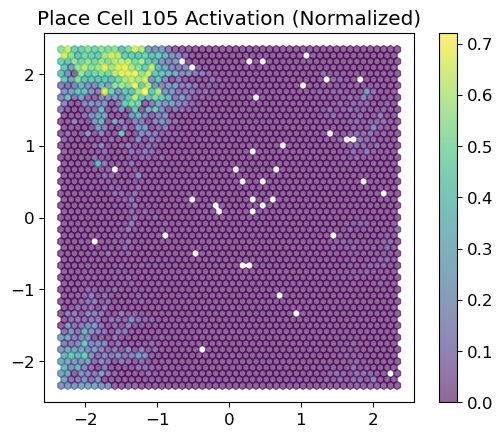

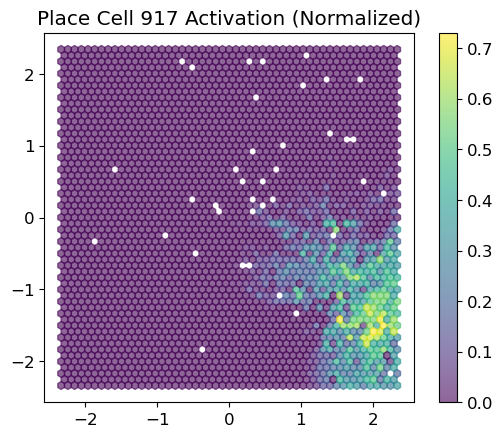

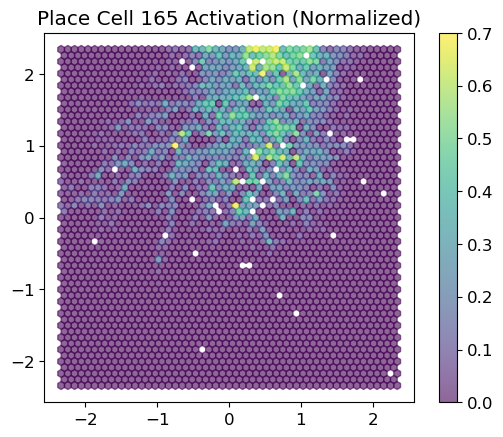

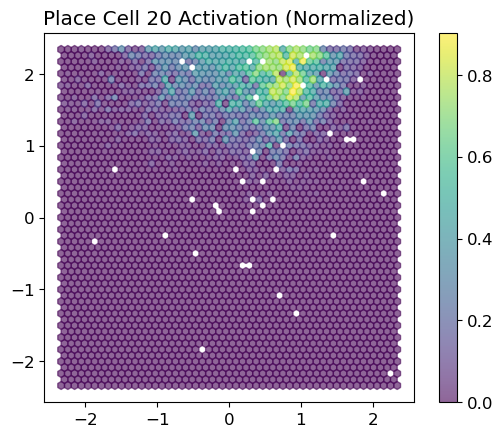

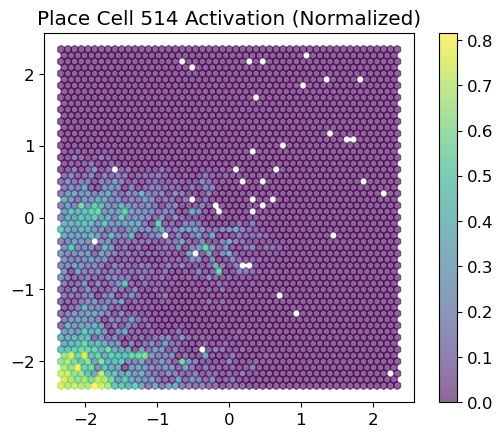

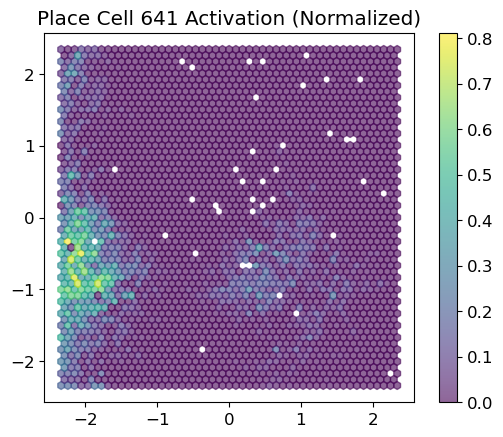

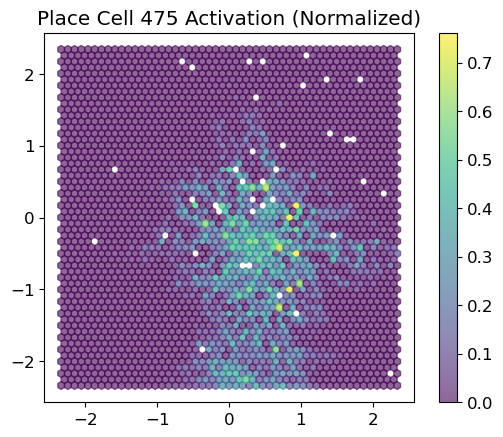

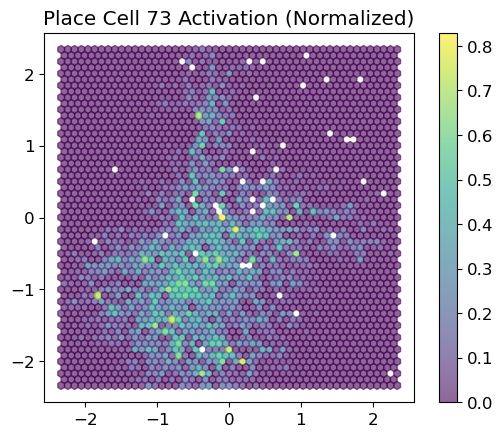

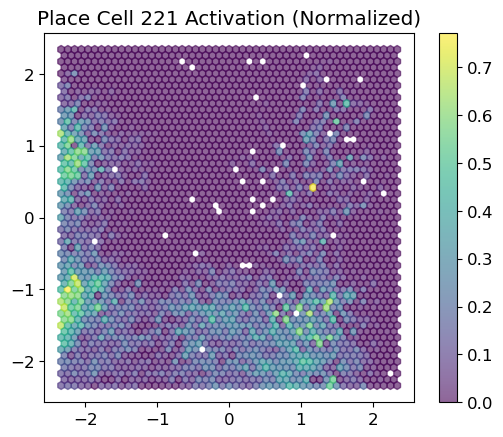

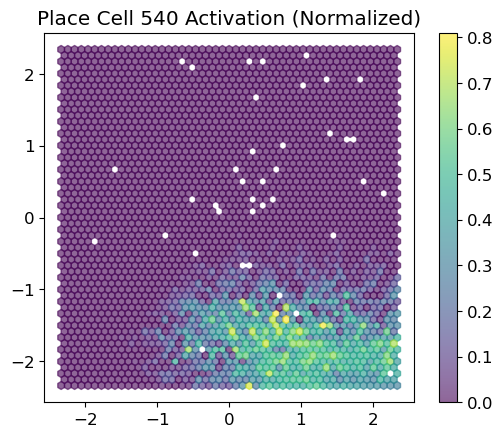

In [73]:
def probeOne(probed):
    """
    Visualizes the activation of a specific place cell (probed) over the environment map.
    """
    fig = plot.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')

    # Plot place cell activations using hexbin for better visualization
    cntr = ax.hexbin(hmap_x, hmap_y, hmap_z[:, probed].flatten(), gridsize=50, cmap=cmap, alpha=0.6)

    # Add colorbar and title
    plot.colorbar(cntr)
    v = f"v_{{{probed}}}^p"
    plot.title(f"Place Cell {probed} Activation")
    plot.show()

# Calculate the total activation for each place cell
total_activations = np.sum(hmap_z, axis=0)

# Get the indices of the top 10 most activated place cells
top_10_cells = np.argsort(total_activations)[-10:]

# Plot the activations for the top 10 place cells
for cell in top_10_cells:
    probeOne(cell)

IndexError: invalid index to scalar variable.

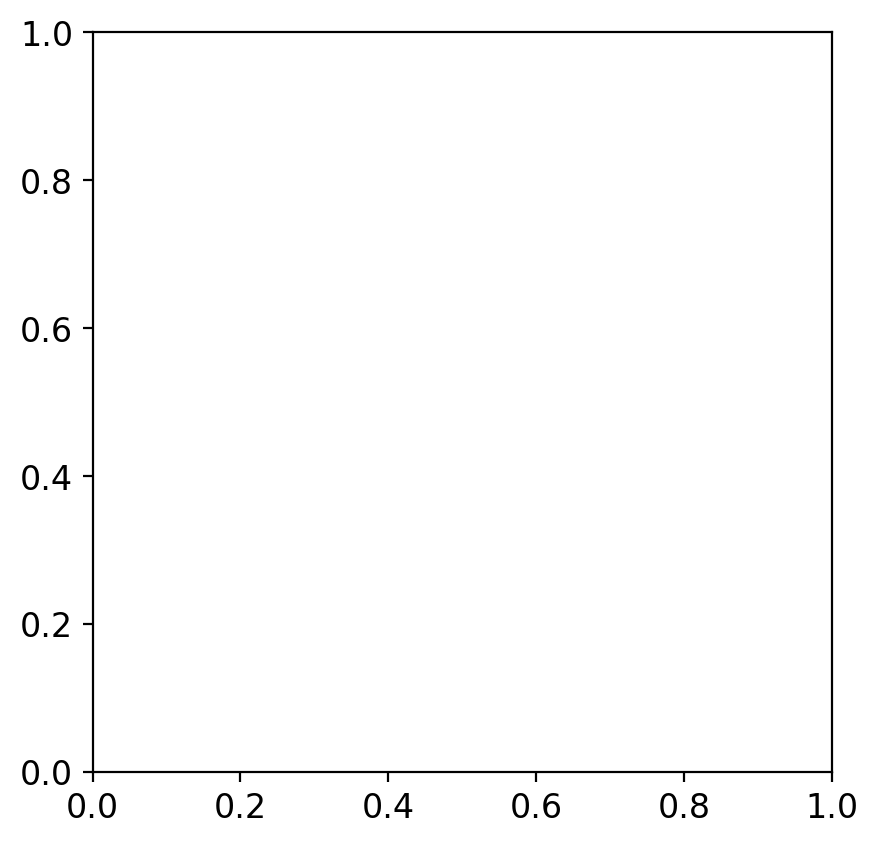

In [71]:
def rewardMapPlot(context=0):
    """
    Displays a reward map over the environment, showing how rewards are distributed spatially.

    Parameters:
    context (int, optional): The context index to display in the title.
    """
    # Compute reward function
    sum_activations = tf.reduce_sum(hmap_z, -1)
    safe_denominator = tf.where(sum_activations > 0, tf.cast(sum_activations, tf.float32), 1)
    reward_function = tf.tensordot(rc_net.w_in[context], tf.cast(hmap_z.T, tf.float32), 1) / safe_denominator
    reward_function = tf.reduce_mean(reward_function, axis=0)  # Average across all inputs to get a single value per location

    fig = plot.figure(dpi=200)
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')

    # Set params for better display
    params = {'mathtext.default': 'regular'}
    plot.rcParams.update(params)

    # Plot reward map using hexbin and overlay grid
    cntr = ax.hexbin(hmap_x, hmap_y, reward_function.numpy(), gridsize=50, cmap=cmap, alpha=0.6)

    # Draw the goal location as a green circle
    goal = plot.Circle(goalLocation, goal_r, color='green', alpha=0.5, fill=True)
    ax.add_patch(goal)

    # Set limits and hide axes for cleaner display
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    # Add a colorbar and title to the plot
    fig.colorbar(cntr)
    plot.title(f"Reward Map Visualization for context {context + 1}, goal in green")
    plot.show()

# Example usage:
rewardMapPlot(context=0)


ValueError: not enough values to unpack (expected at least 1, got 0)

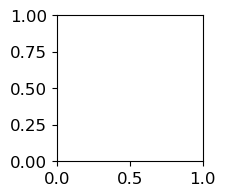

In [4]:
def showTopThree():
    """
    Shows the activations of the top 3 place cells based on their reward values or activations.
    """
    top_3 = tf.math.top_k(rc_net.w_in, k=3).indices.numpy()

    fig = plot.figure()

    for idx, cell in enumerate(top_3):
        ax = fig.add_subplot(1, 3, idx+1)
        ax.set_aspect('equal')

        # Plot the place cell activations
        ax.tricontourf(hmap_x, hmap_y, hmap_z[:, cell], cmap=cmap)
        ax.set_ylim(5, -5)
        plot.title(f"Place Cell {cell}, Max Activation: {hmap_z[:, cell].max()}")

    plot.show()

showTopThree()